### Notebook Imports

In [1]:
import os
import skimage.io as io
import matplotlib.pyplot as plt
from PIL import Image

from torchvision import transforms

import numpy as np
import nltk
from vocabulary import Vocabulary
import torch
import torch.utils.data as data
import pickle

from model import EncoderCNN, DecoderRNN

### Initialization

In [2]:
encoder_file = 'encoder-3.pkl'
decoder_file = 'decoder-3.pkl'

embed_size = 512
hidden_size = 512

# The size of the vocabulary.
vocab_size = 10321

# Initialize the encoder and decoder, and set each to inference mode.
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()

# Load the trained weights.
encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))

# Move models to GPU 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder.to(device)
decoder.to(device)

DecoderRNN(
  (word_embedding): Embedding(10321, 512)
  (lstm): LSTM(512, 512, batch_first=True)
  (fc): Linear(in_features=512, out_features=10321, bias=True)
)

In [3]:
#load vocab.pkl
with open('vocab.pkl', 'rb') as f:
    vocab = pickle.load(f)
    

In [5]:
def clean_sentence(output):
 
    sentence = ""
    for idx in output:
        if idx == 0:
            continue
        if idx == 1:
            break
        word = vocab.idx2word[idx]
        sentence = sentence + word + ' '
        
    return sentence

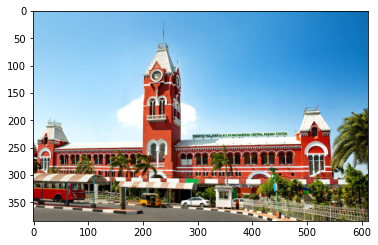

a large clock tower towering over a city . 


In [25]:
transform_test = transforms.Compose([ 
    transforms.Resize(256),                          
    transforms.CenterCrop(224),                             
    transforms.ToTensor(),                           
    transforms.Normalize((0.485, 0.456, 0.406),      
                         (0.229, 0.224, 0.225))])

def get_prediction_from_image(loc):
    image = Image.open(loc)
    plt.imshow(image)
    plt.show()
    image = transform_test(image).unsqueeze(0)
    image = image.to(device)
    features = encoder(image).unsqueeze(1)
    output = decoder.sample(features)    
    sentence = clean_sentence(output)
    print(sentence)

get_prediction_from_image('./test_samples/15.jpg')